# Distribution Plots

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
# Seaborn comes with bulit-in datasets
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## displot
The distplot shows the distrubition of a univarate set of observations

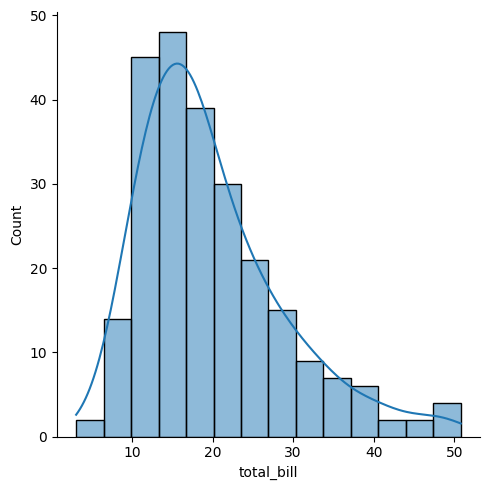

In [3]:
sns.displot(tips['total_bill'],kde=True)

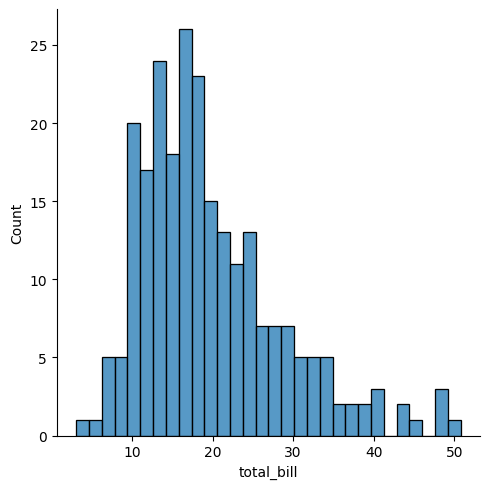

In [4]:
sns.displot(tips['total_bill'],bins=30)

## jointplot
jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

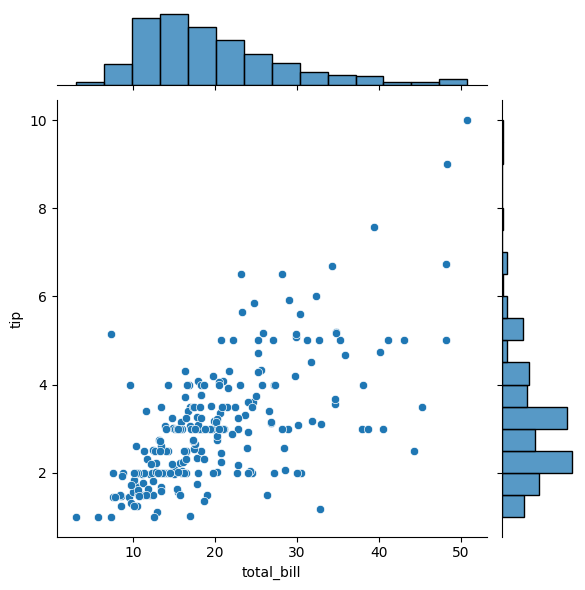

In [5]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

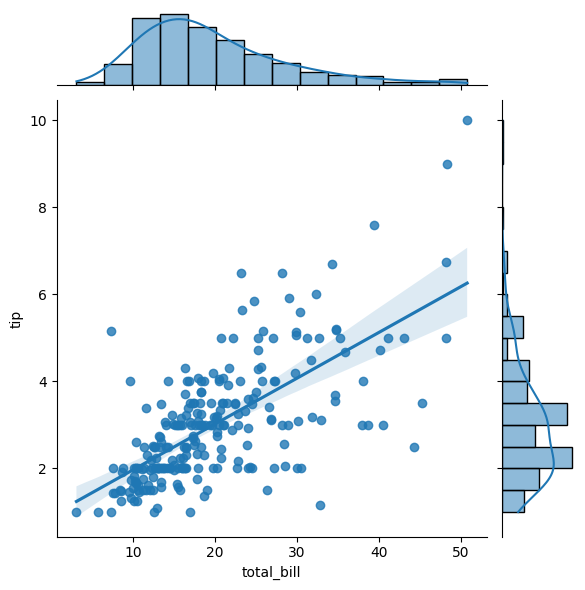

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot
pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

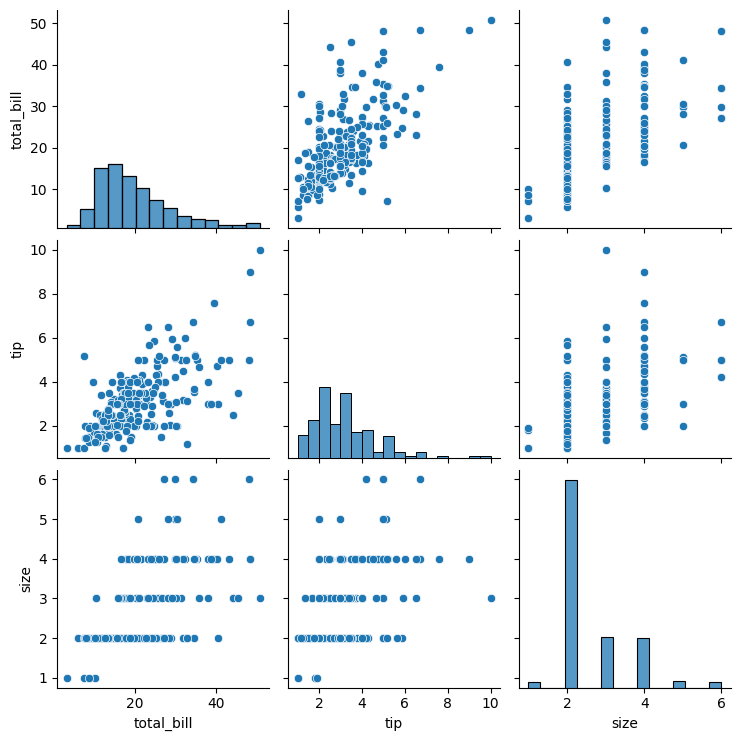

In [7]:
sns.pairplot(tips)

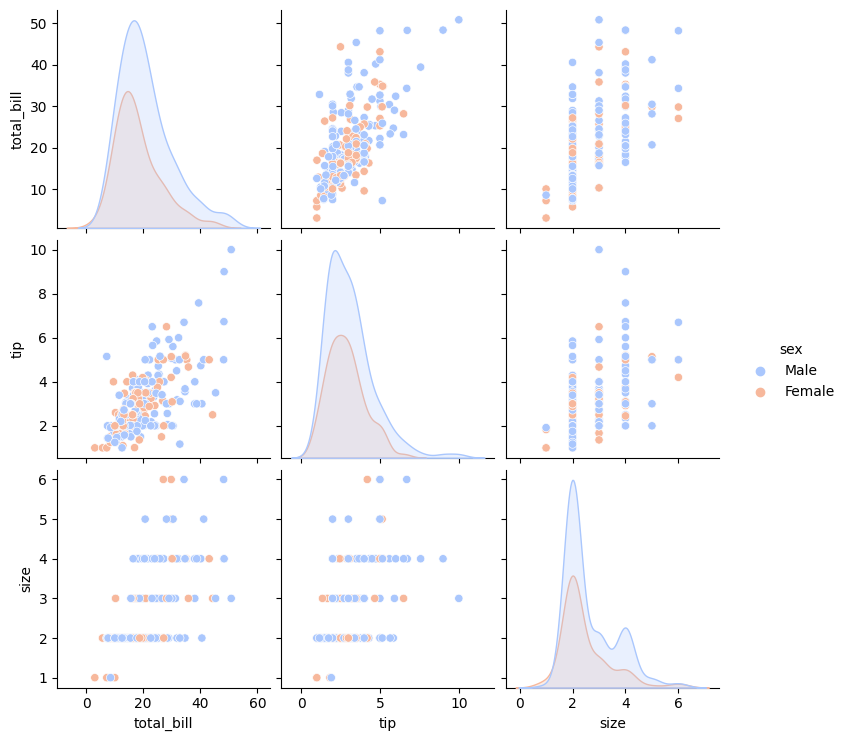

In [8]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot
rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

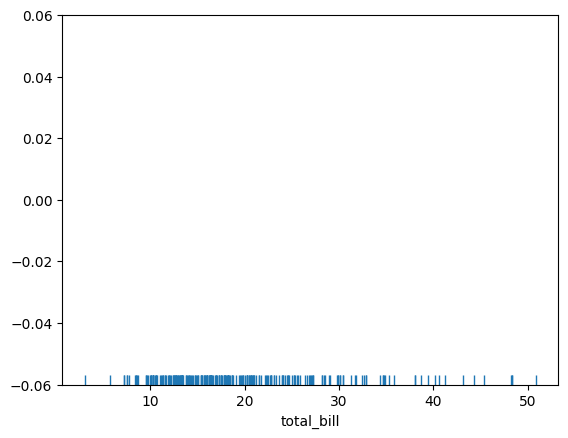

In [9]:
sns.rugplot(tips['total_bill'])

## kdeplot
kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

<AxesSubplot:xlabel='tip', ylabel='Density'>

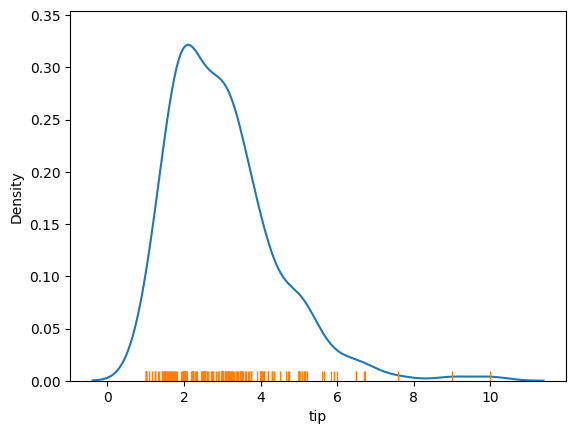

In [10]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Data Plots

* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

## barplot and countplot
These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

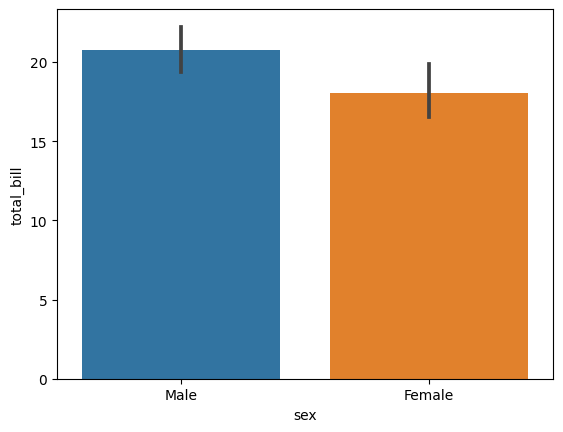

In [11]:
sns.barplot(x='sex',y='total_bill',data=tips)

You can change the estimator object to your own function, that converts a vector to a scalar:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

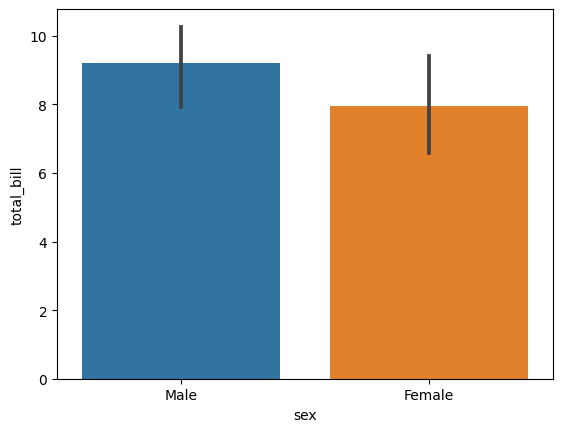

In [12]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot
This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<AxesSubplot:xlabel='sex', ylabel='count'>

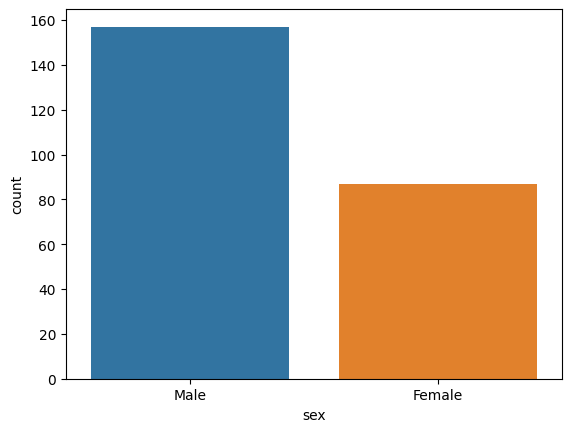

In [13]:
sns.countplot(x='sex',data=tips)

## boxplot and violinplot
boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

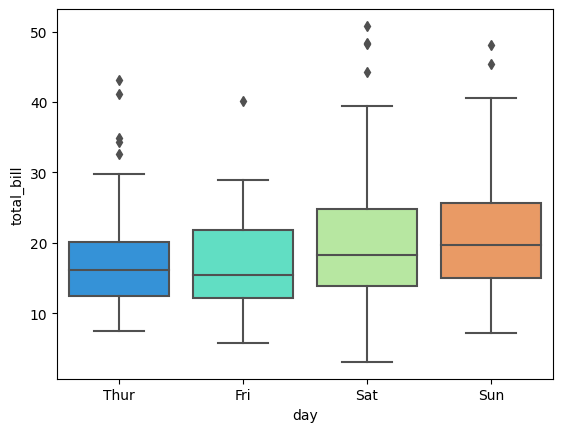

In [14]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:>

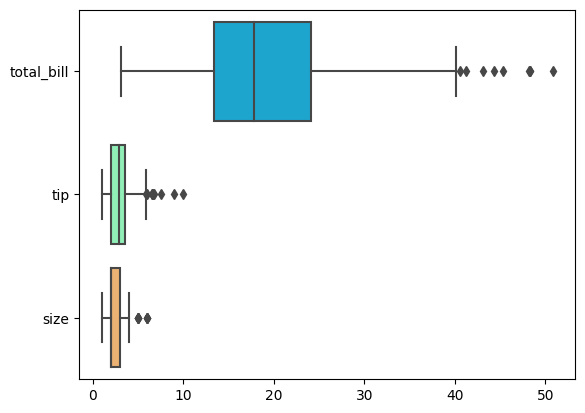

In [15]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

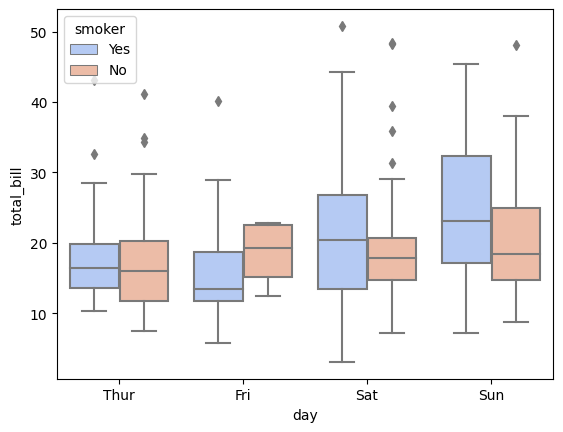

In [16]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

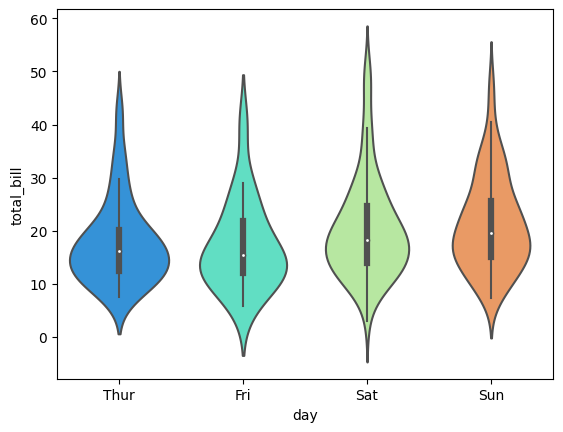

In [17]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

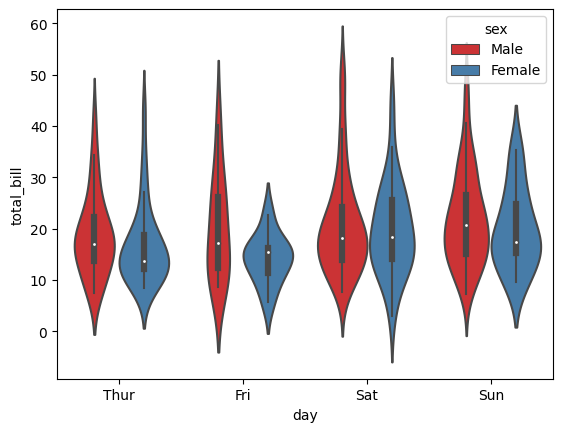

In [18]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

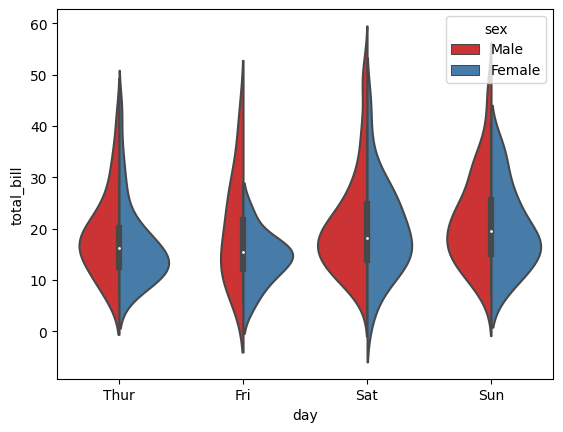

In [19]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<AxesSubplot:xlabel='day', ylabel='total_bill'>

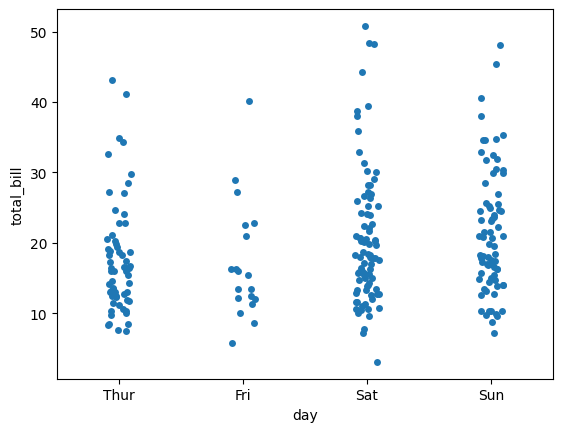

In [20]:
sns.stripplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

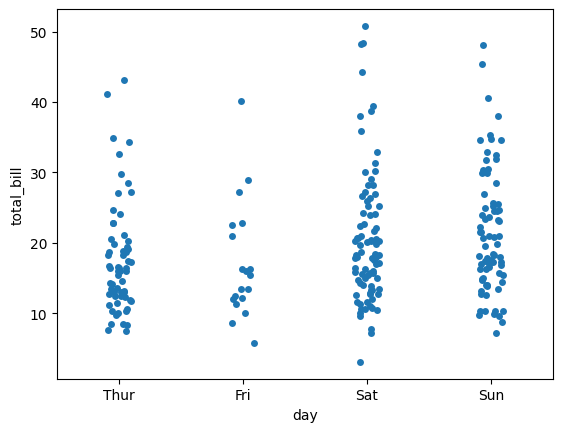

In [21]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

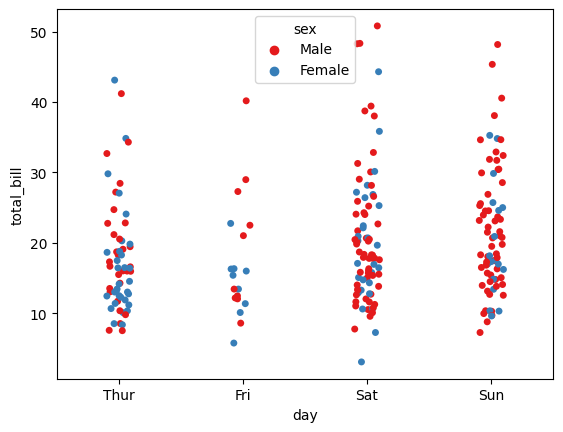

In [22]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

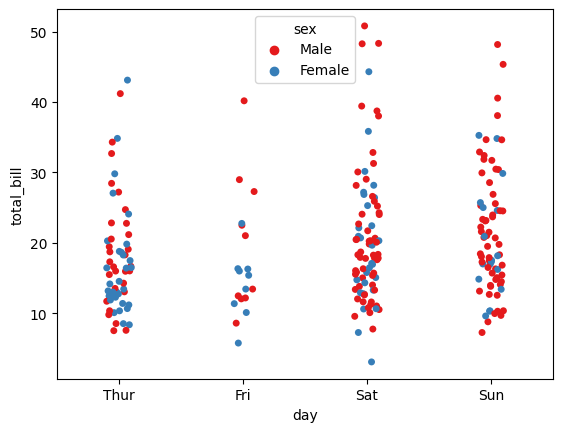

In [23]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

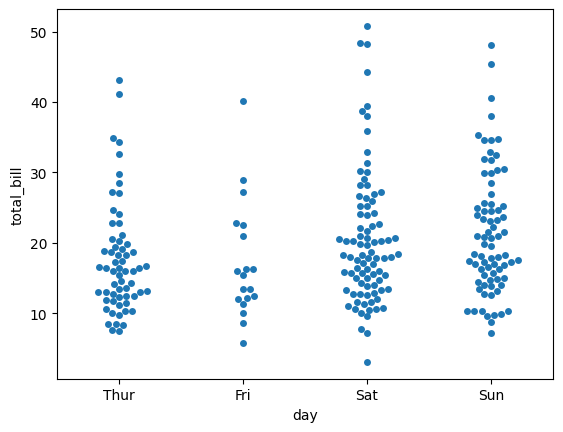

In [24]:
sns.swarmplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

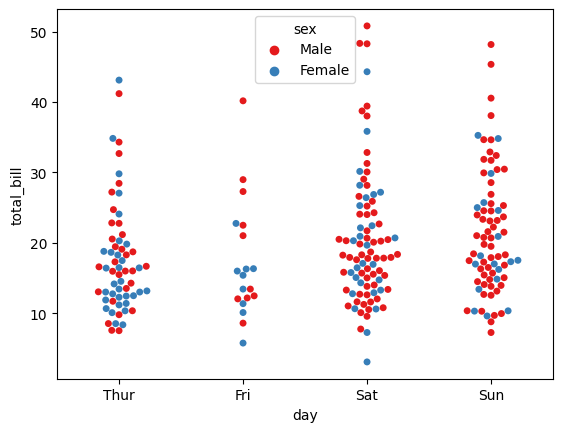

In [25]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1")

### Combining Categorical Plots

<AxesSubplot:xlabel='tip', ylabel='day'>

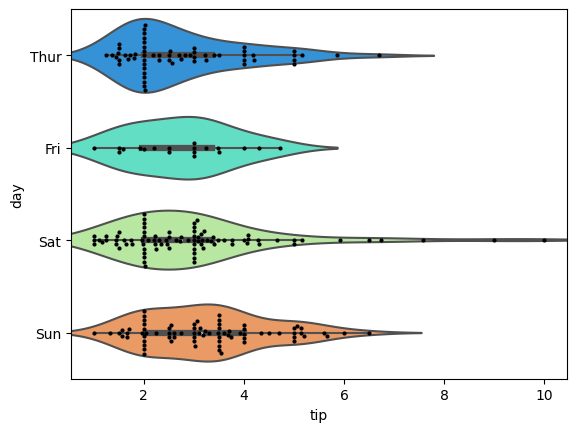

In [26]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

# Matrix Plots
Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data

In [27]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')

## Heatmap
In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [28]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

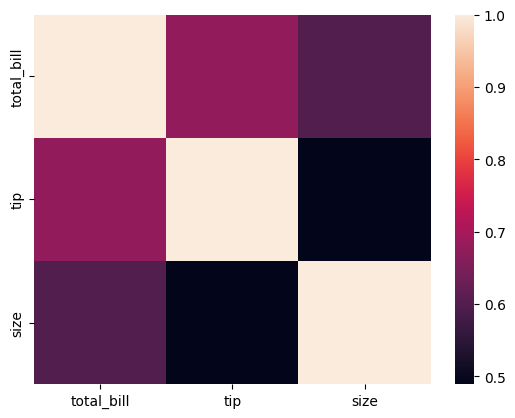

In [29]:
sns.heatmap(tips.corr())

<AxesSubplot:>

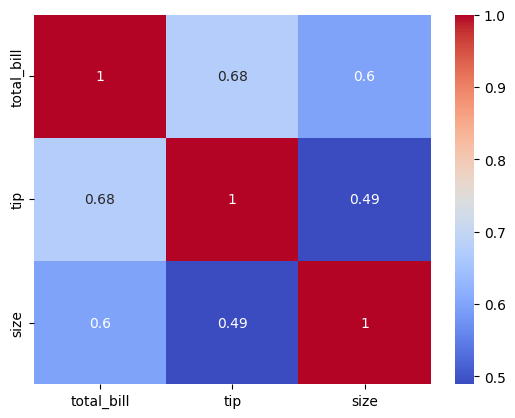

In [30]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [31]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

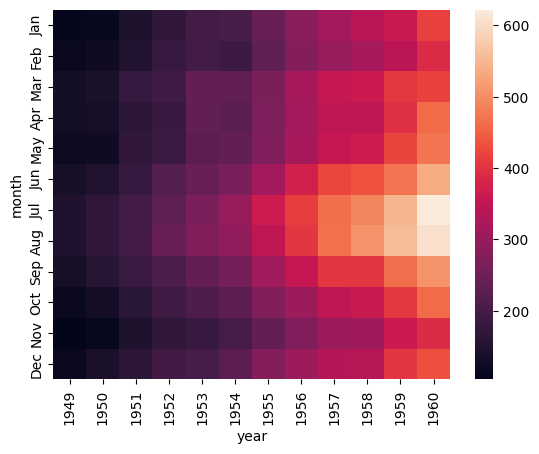

In [32]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

<AxesSubplot:xlabel='year', ylabel='month'>

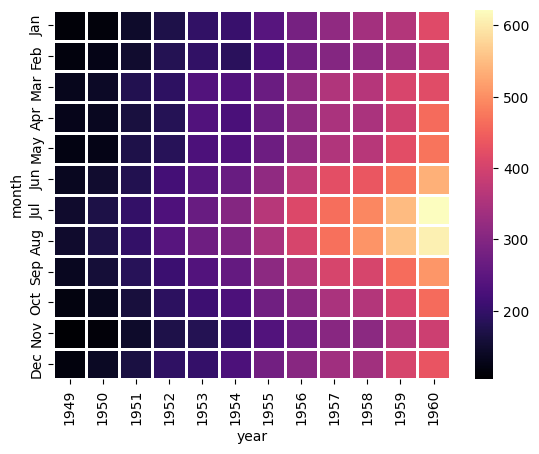

In [33]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

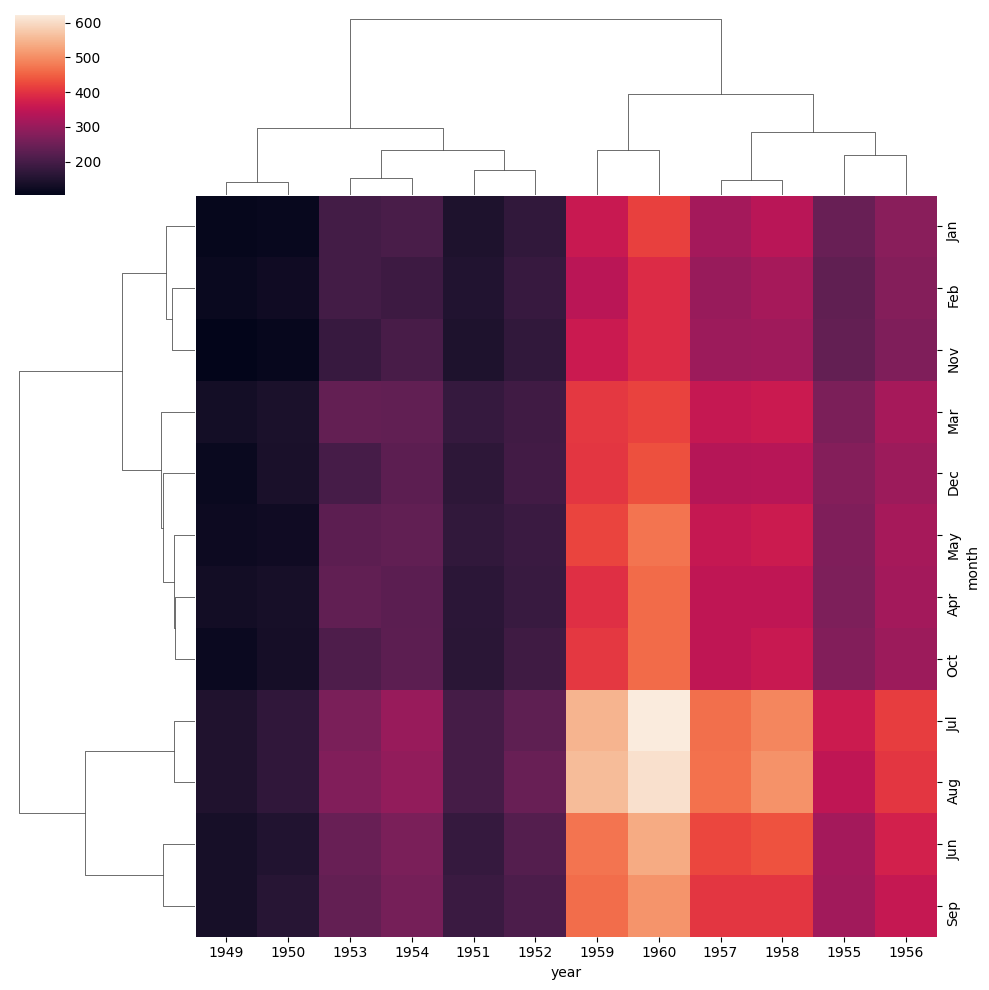

In [34]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

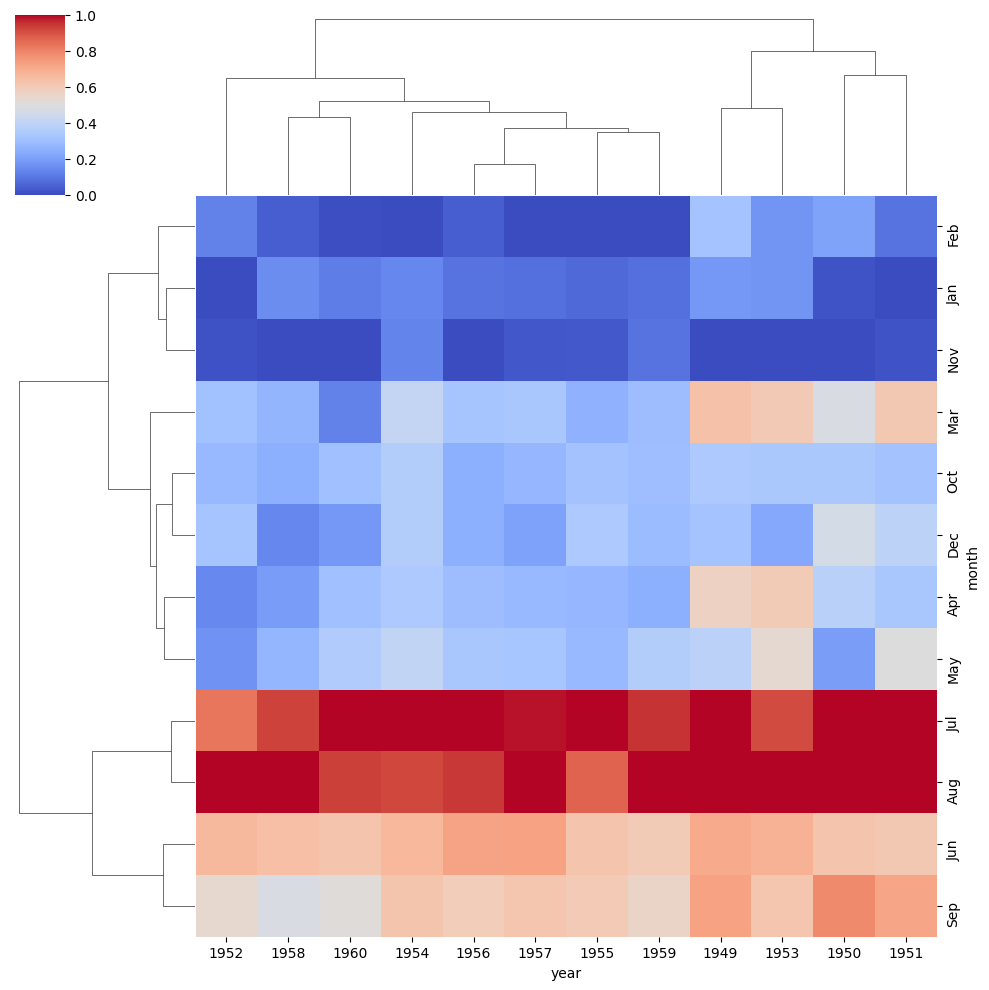

In [35]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Grids
Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [36]:
import matplotlib.pyplot as plt

In [37]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid
Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

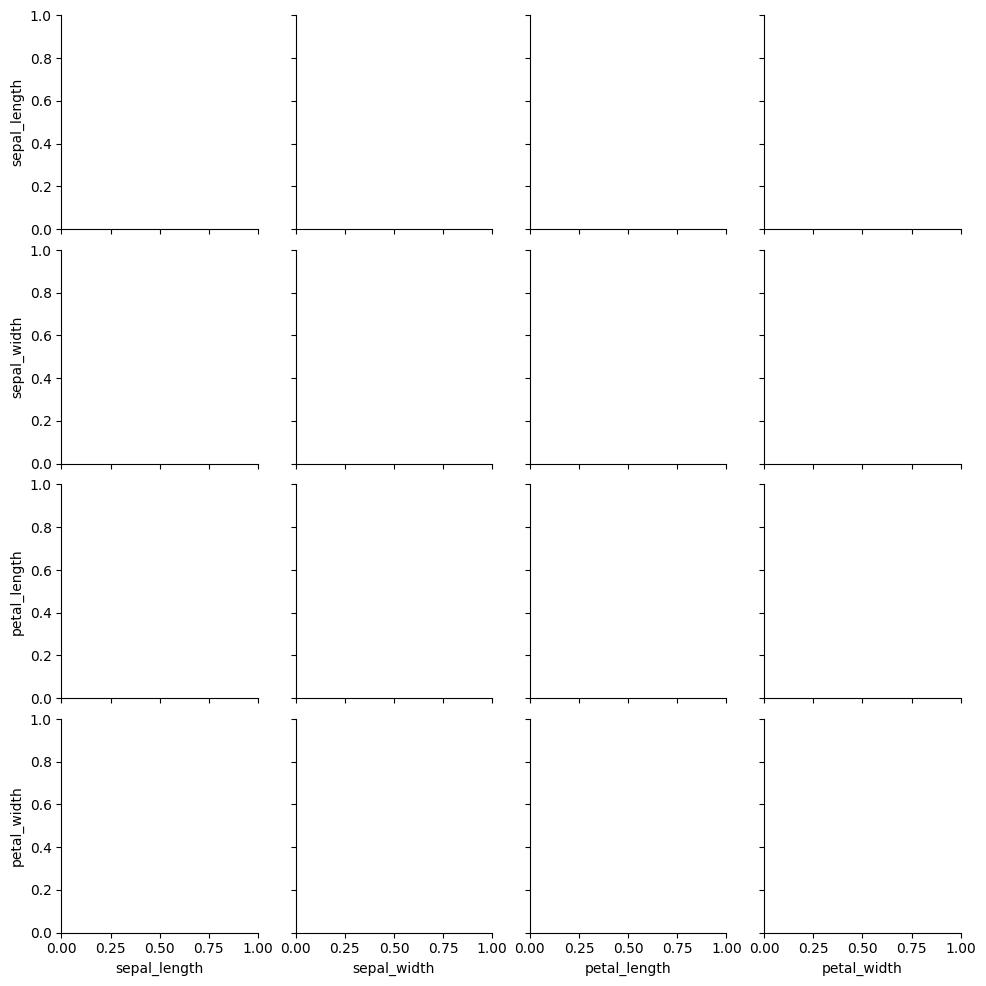

In [38]:
# Just the Grid
sns.PairGrid(iris)

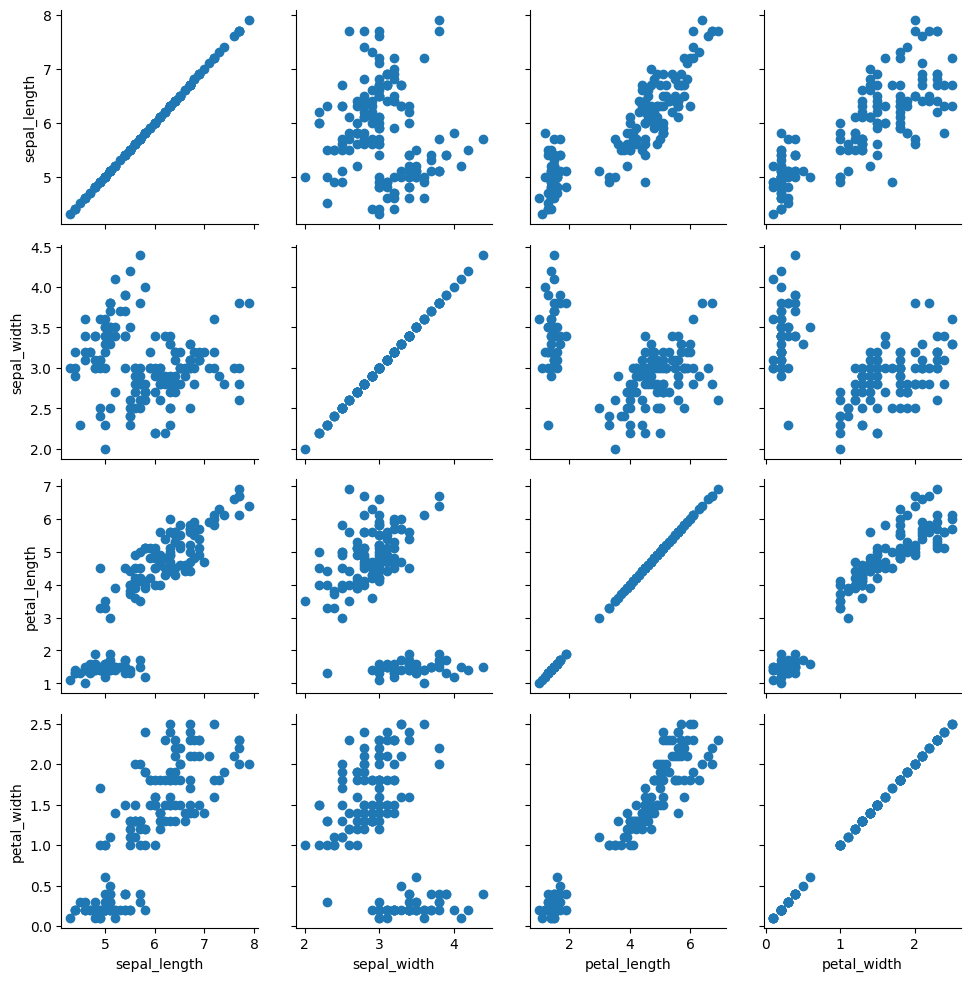

In [39]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

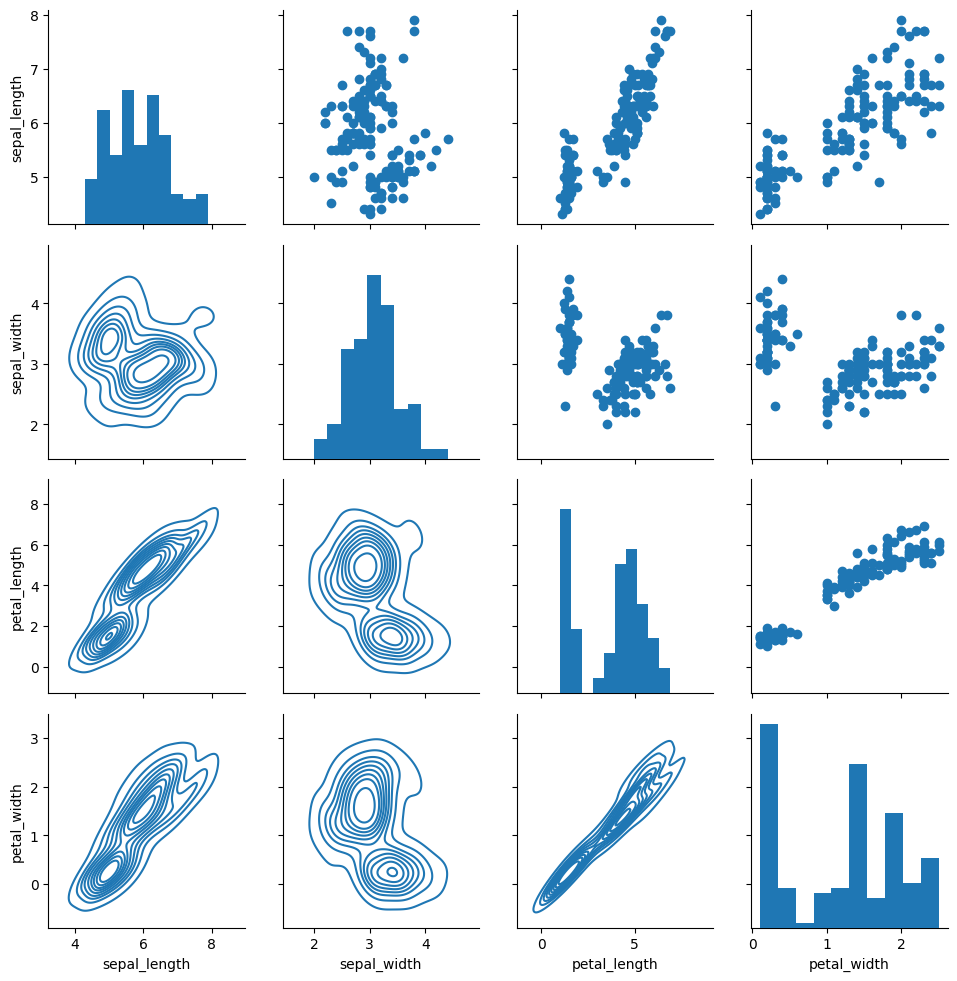

In [40]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot
pairplot is a simpler version of PairGrid (you'll use quite often)

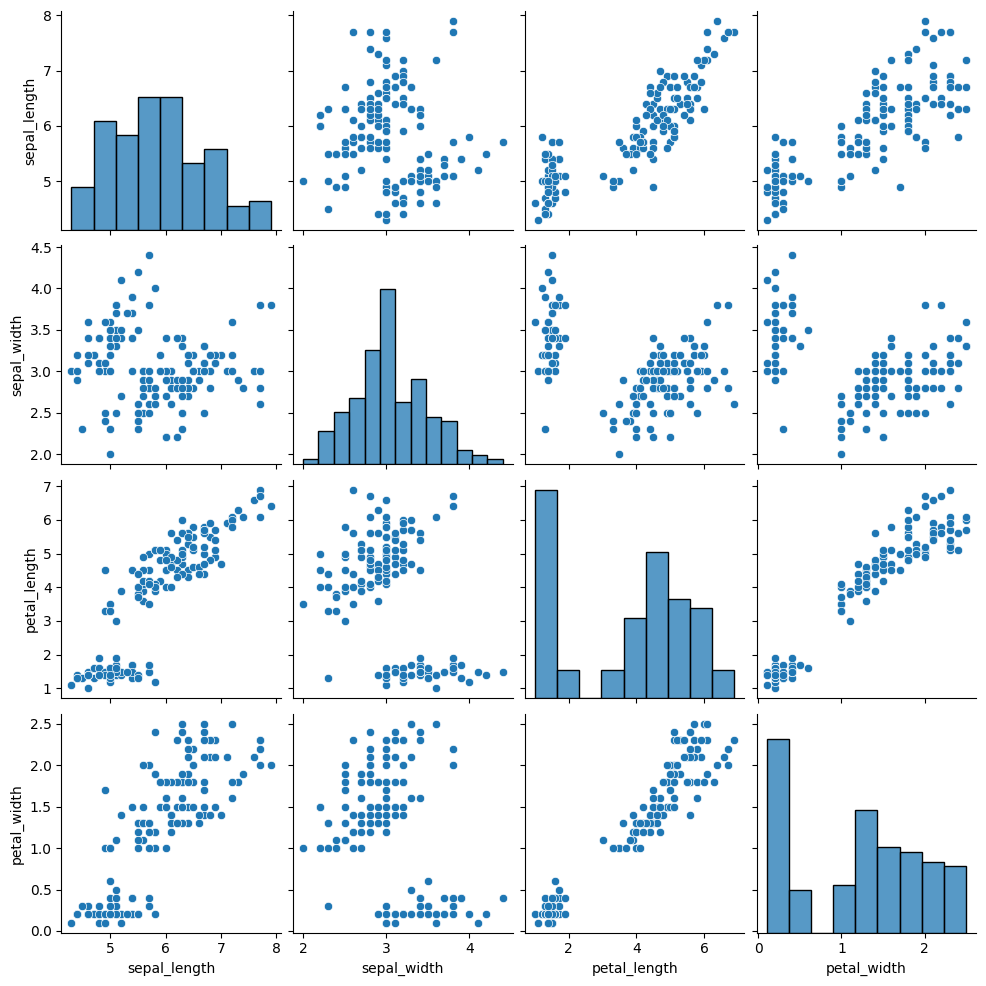

In [41]:
sns.pairplot(iris)

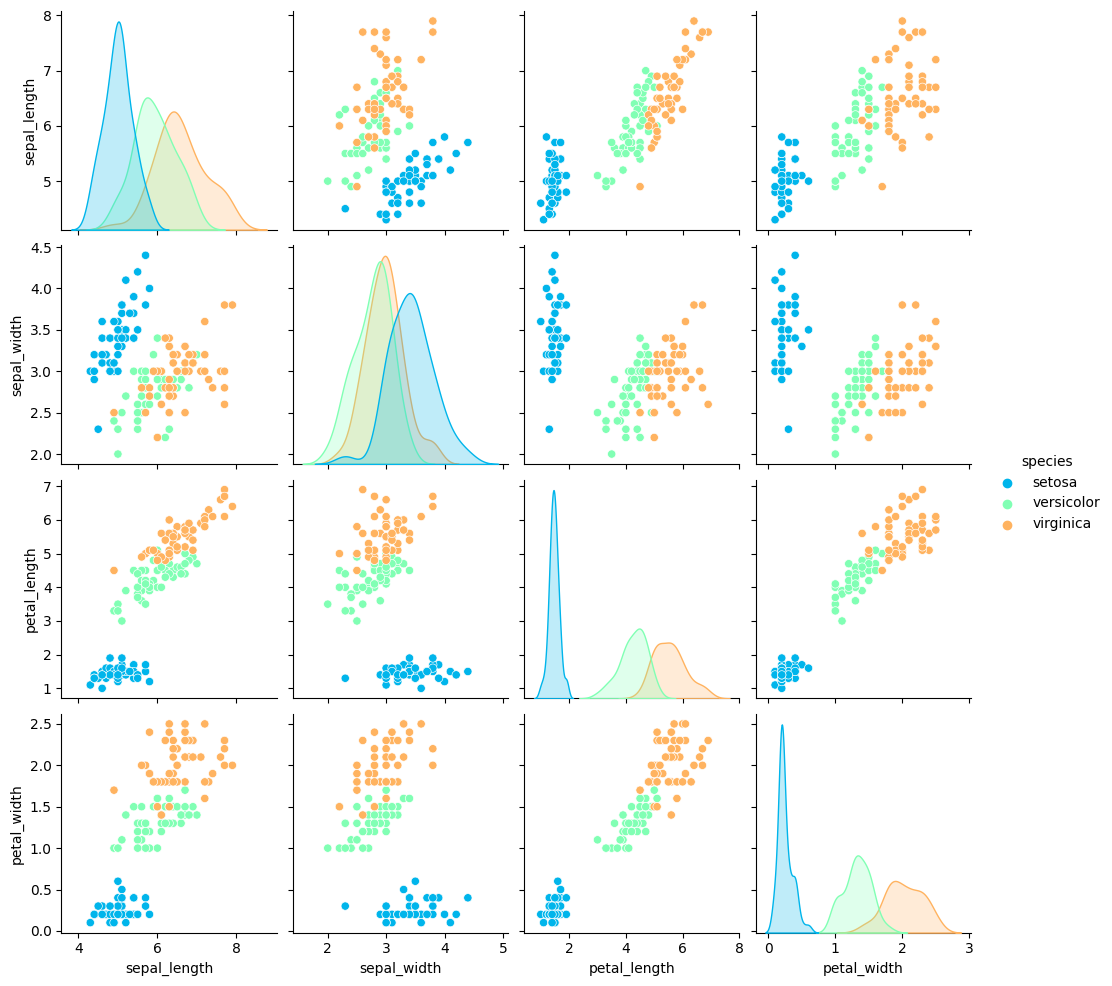

In [42]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid
FacetGrid is the general way to create grids of plots based off of a feature:

In [43]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


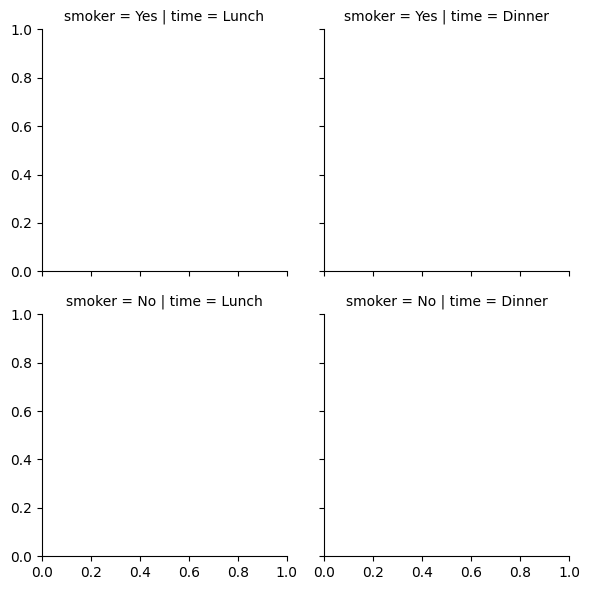

In [44]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

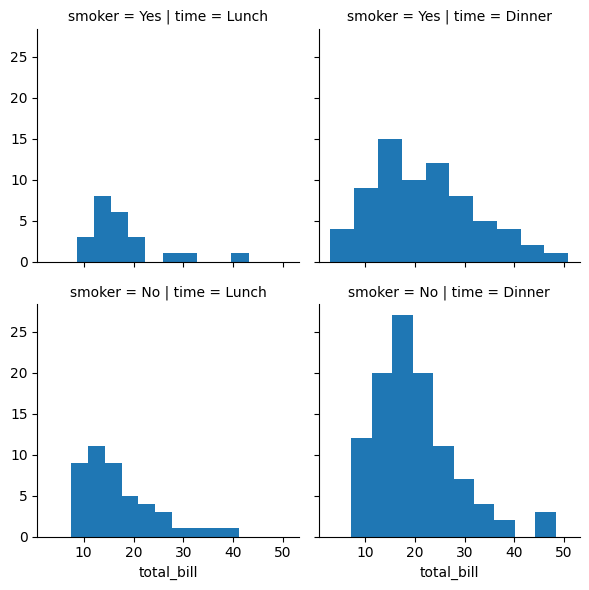

In [45]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

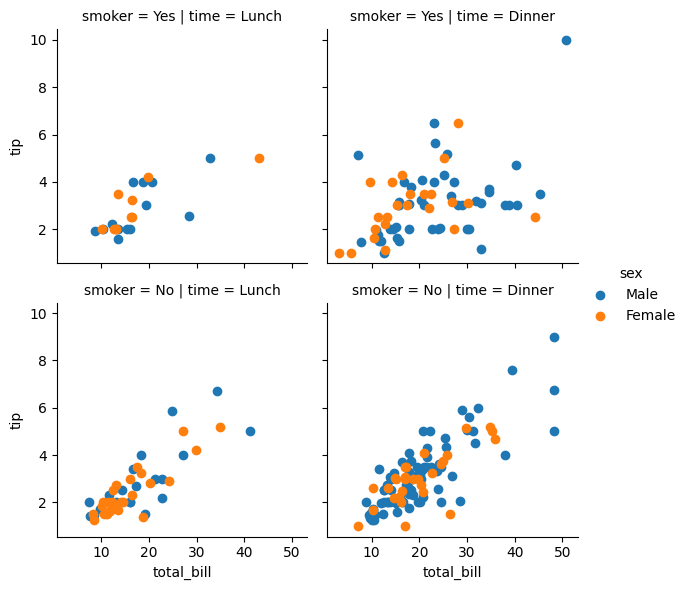

In [46]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

# Regression Plots
Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

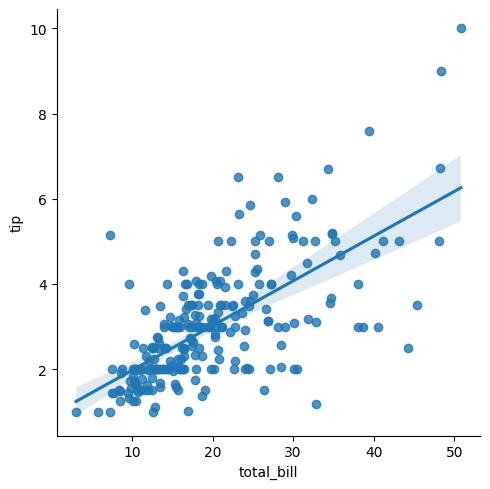

In [47]:
sns.lmplot(x='total_bill',y='tip',data=tips)

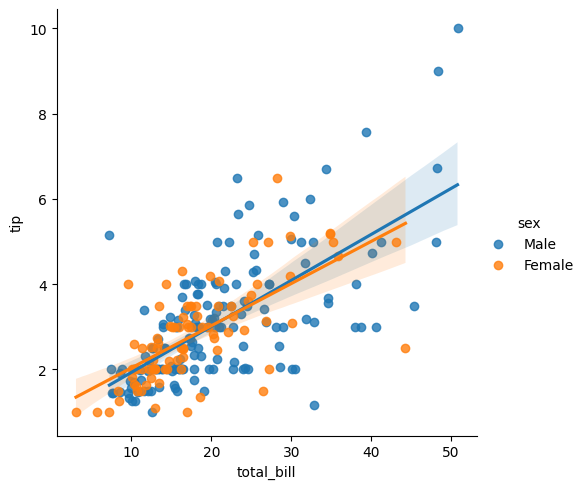

In [48]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

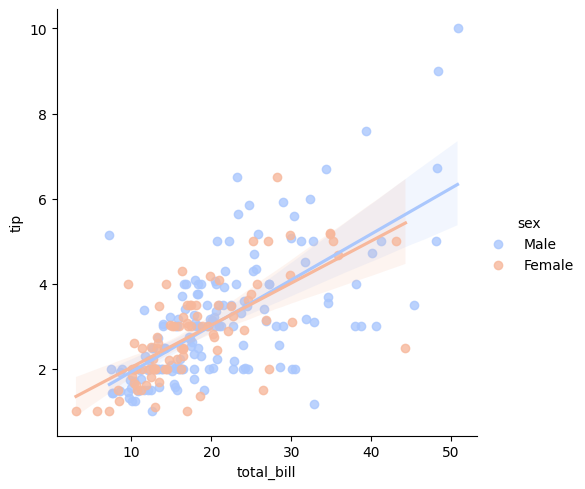

In [49]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

## Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

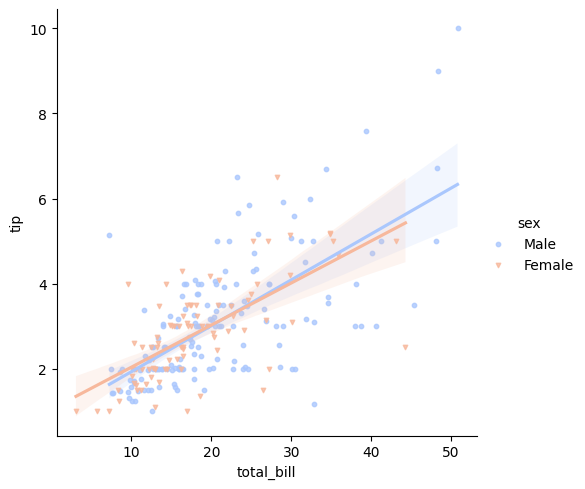

In [50]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':10})

## Using a Grid
We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

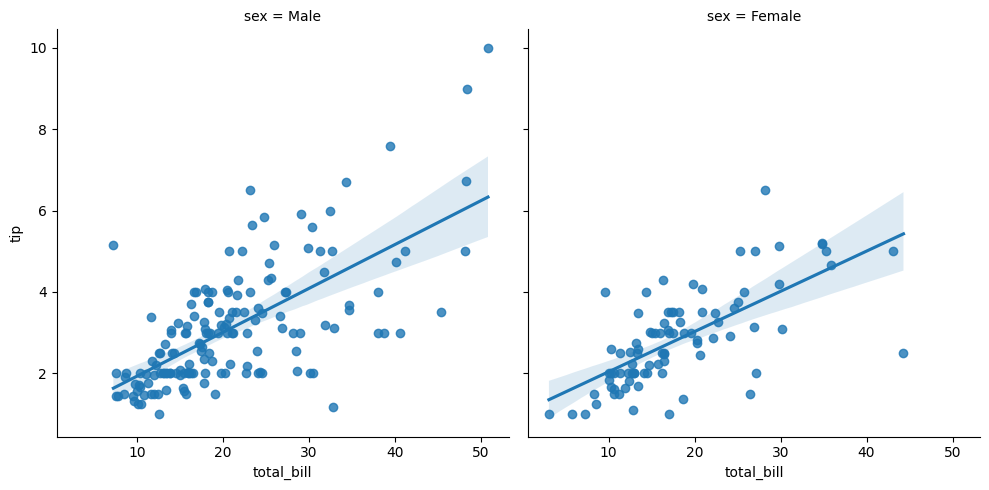

In [51]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

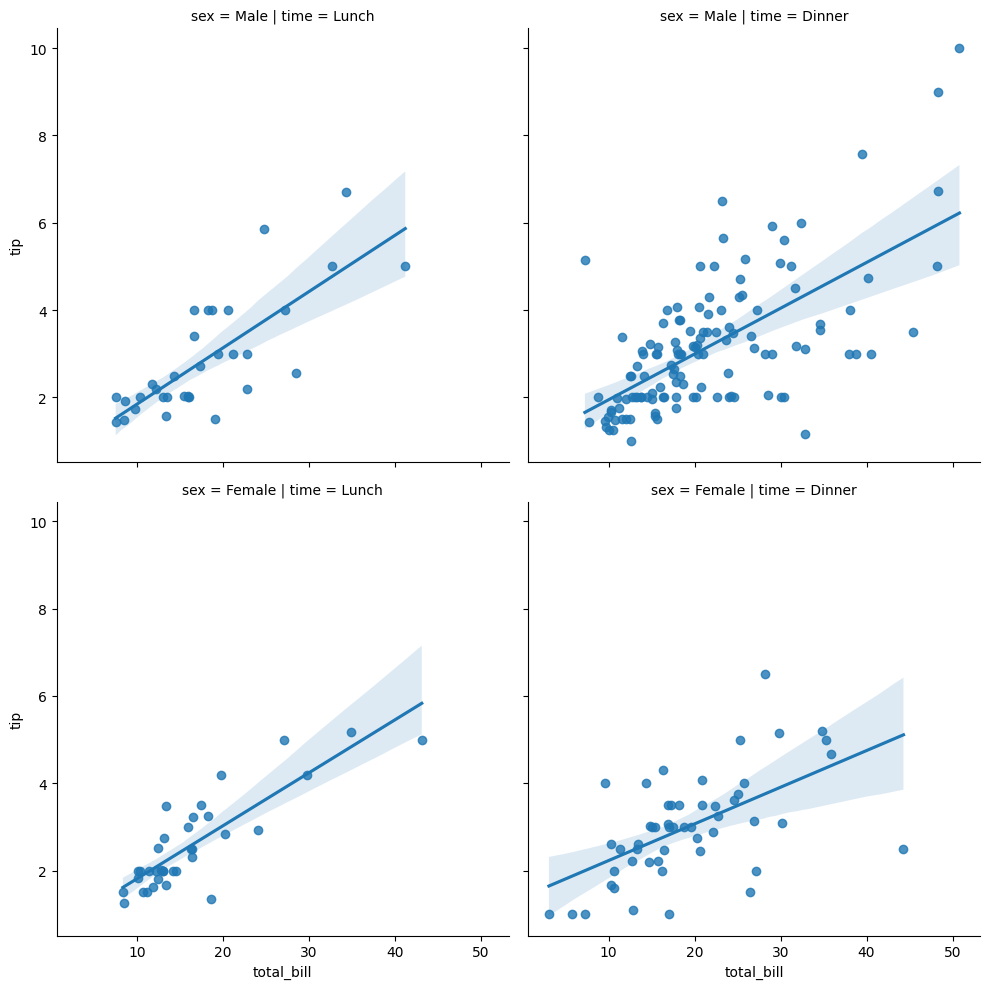

In [52]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

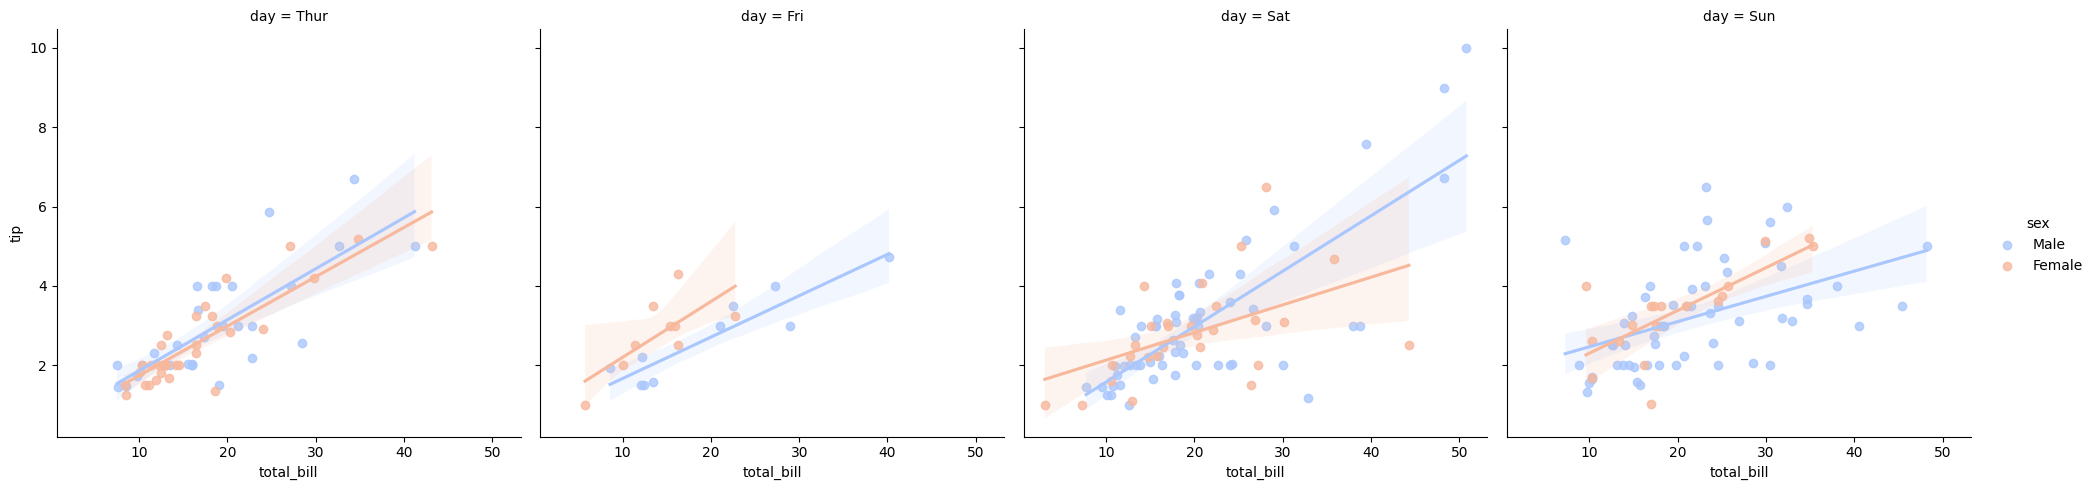

In [53]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspect and Size
Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

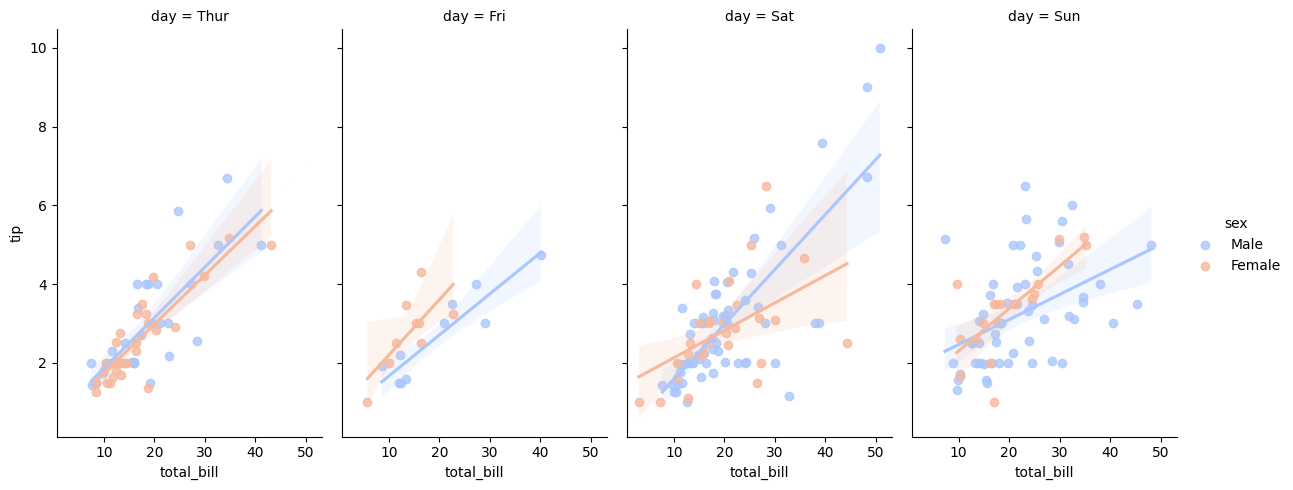

In [54]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6)

# Style and Color

## Styles

<AxesSubplot:xlabel='sex', ylabel='count'>

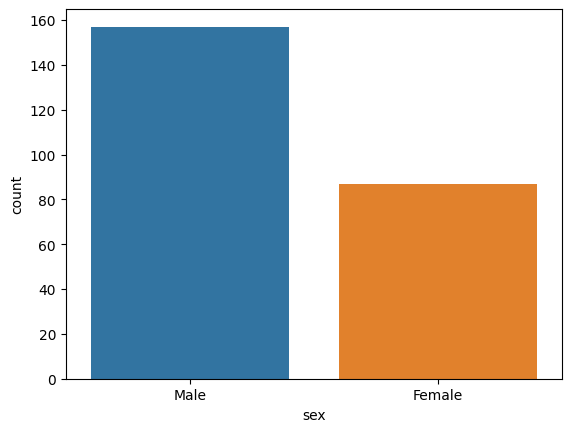

In [55]:
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

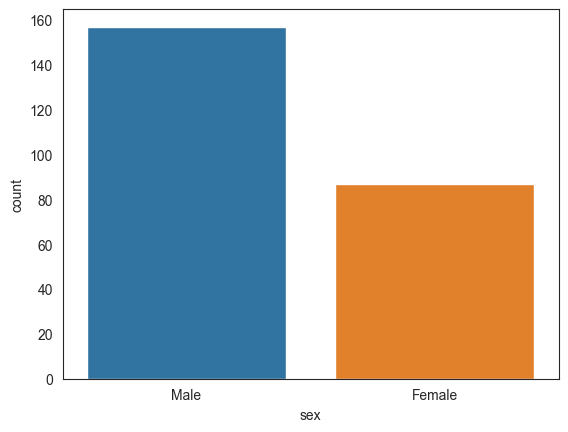

In [56]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

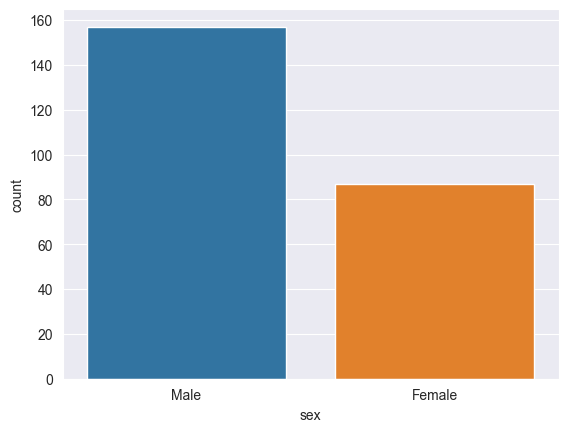

In [57]:
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

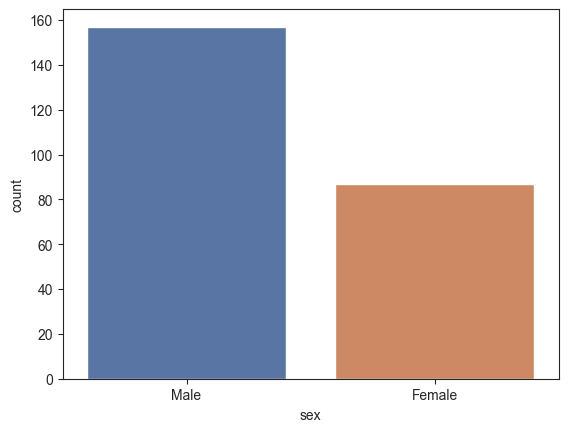

In [58]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

### Spine Removal

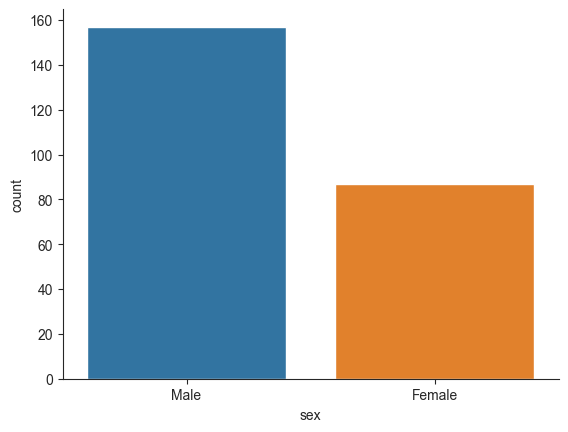

In [59]:
sns.countplot(x='sex',data=tips)
sns.despine()

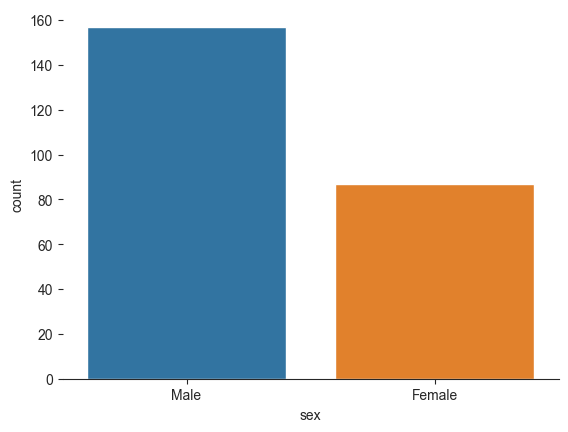

In [60]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Size and Aspect
You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

<AxesSubplot:xlabel='sex', ylabel='count'>

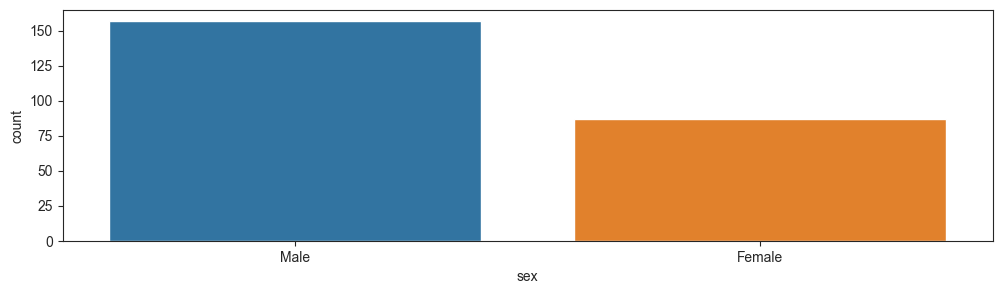

In [61]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

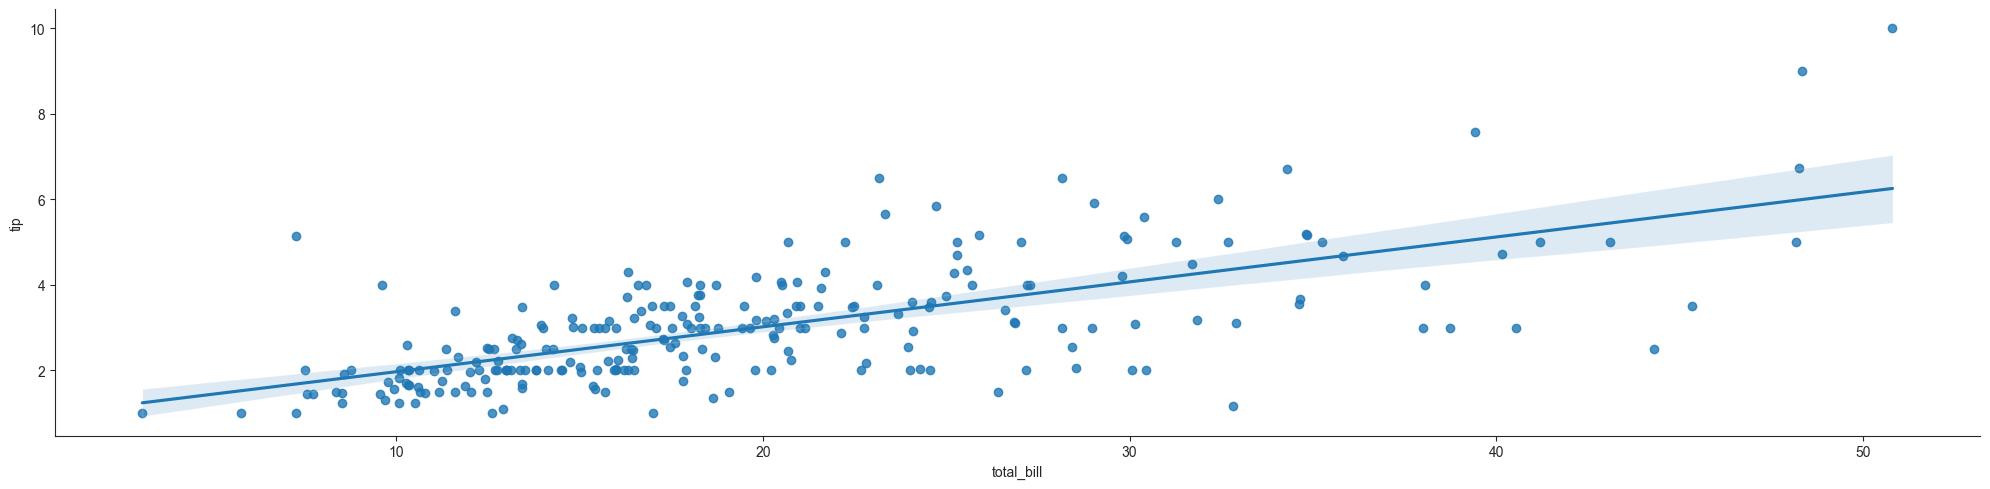

In [62]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',aspect=4,data=tips)

## Scale and Context
The set_context() allows you to override default parameters:

<AxesSubplot:xlabel='sex', ylabel='count'>

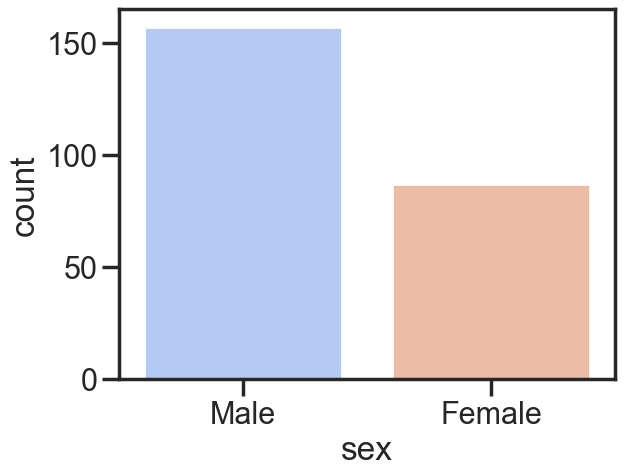

In [63]:
sns.set_context('poster',font_scale=1)
sns.countplot(x='sex',data=tips,palette='coolwarm')